# 1. Journal Review (1)

<span class="girk">Generative Adversarial Nets by Ian Goodfellow, Univerity of Montreal</span>

- GAN의 이론적 개념 제시 (minmax problem)
- GAN이 풀어야하는 문제가 global minimum에서 unique solution을 갖고, 어떤 조건을 만족하면 해당 솔루션으로 수렴한다는 것을 증명

## 1.1. Introduction

- So far, 딥러닝에서 가장 큰 성과는 고차원에서 class label로 맵핑하는 discriminative model이었다.
- Generative model은 아주 다루기 힘든 확률 계산의 approximation이 힘들기 때문에, 주목받지 못했었지만 새로운 생성 모델을 제안 

-----

- adversarial하게 모델이 구성되어, 위조된 화폐가 구별이 안갈때까지 학습이 진행되는 것
  - Sample이 model의 distribution에서 왔는지, data의 distribution에서 왓는지 구분하는 법을 배우는 __Discriminative model__
  - Generator : 화폐 위조범
  - Discriminator : 화폐 위조를 잡으려는 경찰
  
![image](https://user-images.githubusercontent.com/48466625/64939287-7ec6d080-d89b-11e9-876b-dcab861e0c34.png)

![image](https://user-images.githubusercontent.com/48466625/64931804-e702bb80-d875-11e9-82c5-10e8aa9ee819.png)

## 1.2. Related Work

- Until recently, deep generative models focused on models that <span class="mark">provided a parametric specification of probability distribution function</span>.
  - 가장 성공적이었던 것은 아마 deep Boltzmann machine
  - 이러한 모델들은 아주 다루기 힘든 likelihood function을 가지고 있어, likelihood gradient에 대해 수많은 근사를 요구했다.
  - likelihood를 명시적으로 나타내지 않는 모델이면서, <span class="mark">원하는 분포로부터 샘플을 생성해낼 수 있는 모델</span>이 필요했다.

----------

- Generative stochastic network는 볼츠만 머신에서 요구했던 수많은 approximation 대신, <span class="mark">backpropagation으로 학습될 수 있는 모델,</span>
- 여기서 Markov chains만 제거한 것이 GAN 연구의 연장선이라 하겠다.

--------------

- VAE 같은 선행 연구에서,
  - 좀더 general한 <span class="mark">stochastic backpropagation</span> 규칙을 제시했는데,
      - Allowing one to <span class="mark">backpropagate thru Gaussian distribution with finite variance,</span>
      - Allowing one to <span class="mark">backpropagate to the covariance, mean parameter</span>
   - 이러한 규칙들은 제너레이터의 Conditional variance를 학습할 수 있게 했다.
- VAE가 GAN과 같이, 두번째 뉴럴네트워크로 미분 가능한 generator network를 갖지만,
- GAN과는 다르게, VAE의 두번째 뉴럴네트워크는 approximate inference를 수행하는 recognition model이다.
- GAN은 visible units들에서 미분을 요구하기 때문에 discrete data를 모델링할 수 없고,
- VAE는 hidden units들에서 미분을 요구하기 때문에 discrete latent variables를 가질 수 없다.

--------

<span class="mark">GAN의 차별점</span>

- competition btw networks is the <span class="mark">sole training criterion</span>
- <span class="mark">one network produces a high dimensional vector, that is used as the input to another network</span>
  - attemps to choose an input that the other network doesn't know how to process
- it's based on <span class="mark">minmax game</span>
  - not an optimization problem with an objective function to be minimized.

## 1.3. Adversarial nets

- Adversarial modeling framework는 모델들이 MLP일때 가장 직관적이다.

![image](https://user-images.githubusercontent.com/48466625/64931064-faf7ee80-d870-11e9-9537-ab24faa17ac9.png)

- 우변 첫번째항 : Discriminator가 데이터를 진짜라고 판단할 수 있는 능력
- 우변 둘째항 : Discriminator가 Generator에서 만든 데이터를 가짜라고 판단할 수 있는 능력
    - D는 가짜와 진짜 구별을 잘 하는 방향으로 학습해야하기 때문 --> Maximize
    - G는 D를 속일 수 있을 정도로 진짜같은 가짜를 만드는 방향으로 학습 --> Minimize
    
![image](https://user-images.githubusercontent.com/48466625/64931904-7c05b480-d876-11e9-924e-b83b8bf94740.png)

    
--------------------------

![image](https://user-images.githubusercontent.com/48466625/64931162-99844f80-d871-11e9-9fb2-09dc4f52b038.png)

- (1-D(G(z))를 minimize하는 방향으로 학습하려다 보니, 
- <span class="mark">학습 초기의 G가 진짜 같은 가짜 이미지 만들어낼 능력이 없어서</span> D가 너무 쉽게 구분해 버려
  - 이러면 Gradient 값이 작아지기 때문에 학습이 잘 안됨.
- 1-D(G(z))는 0근처에서 gradient 값이 너무 작으니까, 
- 대신에 <span class="mark">D(G(z))를 최대하는 방향으로 바꾸면 초기에 큰 gradient가 되면서 문제 해결됨</span>

--------------

학습 방법
![image](https://user-images.githubusercontent.com/48466625/64931239-3a730a80-d872-11e9-8022-d16f053dcdeb.png)

- 2개의 네트워크를 번갈아 가면서 학습 권장
  - G 고정하고 k-step만큼 D학습
  - D 고정하고 G를 1-step만큼 학습
  - <span class="mark">여기서 k는 hyperparameter</span> (논문에서는 1로함)

## 1.4. Theoretical Results

![image](https://user-images.githubusercontent.com/48466625/64931324-db61c580-d872-11e9-870a-73a531e46efc.png)

- 검은 점선은 학습 데이터의 분포 $P_{data}(x)$
- 녹색 실선은 Generator에서 생성되는 데이터의 분포 $P_{model}(x)$
- 파란색 점선은 Discriminator의 출력 : 학습 되면서 최적의 평형 상태인 1/2에 도달함
- 아래쪽 수평선은 $z$가 샘플링 되는 영역, 위는 $x$ 영역

----------------------
__Proofs__

![image](https://user-images.githubusercontent.com/48466625/64931676-04835580-d875-11e9-8324-493613b3a2ef.png)


## 1.5. Experiments

- MNIST, CiFAR-10 등으로 학습.
- Generator --> Rectified linear activations and sigmoid 함수로 구성
- Discriminator 
  - maxout activation
  - Dropout 적용 
  
![image](https://user-images.githubusercontent.com/48466625/64931747-83788e00-d875-11e9-9a53-4b911077760b.png)

# 2. Tutorials

In [8]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import itertools
import math
import time

## 2.1. MNIST dataset

In [9]:
# 데이터 전처리 방식 지정

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)) # 픽셀값 0~1사이를 -1~1로 변경 
])

In [10]:
trainset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [11]:
#데이터를 한번에 batch_size만큼만 가져오는 dataloader를 만든다.

train_loader = DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = DataLoader(testset, batch_size=32, shuffle=True)

In [12]:
images, labels = next(iter(train_loader))

In [13]:
# 이미지와 이미지 그리드 플랏하는 함수

def imshow(img):
    img = (img+1)/2  # Unnormalize  
    img = img.squeeze()
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

def imshow_grid(img): 
    img = torchvision.utils.make_grid(img.cpu().detach())
    img = (img+1)/2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

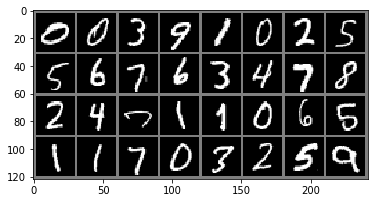

In [14]:
imshow_grid(images)

## 2.2. Generator

- <span class="mark">랜덤 벡터 $z$</span>를 입력으로 받아, 가짜 이미지를 출력하는 함수.
  - $z$ : 단순히 균일분포(Uniform Distribution)이나, 정규분포(Normal Distribution)에서 무작위로 추출한 값
  - 이런 단순한 분포를 얼굴 이미지와 같은 복잡한 분포로 mapping하는 함수.
  - $z$ 벡터가 존재하는 공간 : <span class="mark">Latent space, 잠재 공간의 크기 제한은 없으나 나타내는 대상의 정보를 충분히 담을 수 있을 만큼,</span>

![image](https://user-images.githubusercontent.com/48466625/64939730-f0534e80-d89c-11e9-97b0-4aed552ae1f5.png)

- 본 튜토리얼 조건 
  - latent space 100차원 
  - 4개의 fully connected layer
  - 100차원 -> 256차원 -> 512차원 -> 1024차원 -> 28*28
  - 각 레이어마다 LeakyReLU. 0보다 작은 수는 정해진 작은 숫자 곱하는데, 0.2로
  - 마지막 레이어 출력값은 픽셀값의 범위 -1~1사이로 만들어주기 위해 tanh

In [15]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(in_features=100, out_features=256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(in_features=256, out_features=512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(in_features=512, out_features=1024),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(in_features=1024, out_features=28*28),
        nn.Tanh())
    
    # (배치사이즈, 100차원)을 입력으로 받아서,
    # 이미지 출력 = (배치사이즈,채널,28,28)
    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

## 2.3. Discriminator

- <span class="mark">이미지를 입력</span>으로 받아, <span class="mark">이미지가 진짜일 확률을 0~1사이 숫자로 출력</span>
- 본 튜토리얼 조건 
  - 4개의 fully connected layer
  - 28*28 -> 1024차원 -> 512차원 -> 256차원 으로 점점 줄어듬
  - 각 레이어마다 LeakyReLU. 0보다 작은 수는 정해진 작은 숫자 곱하는데, 0.2로
  - <span class="mark">Dropout 적용, 오버피팅 방지하고 Discriminator가 지나치게 제너레이터보다 빨리 학습되는 것도 막음</span>
  - 마지막 레이어 출력값은 픽셀값의 범위 <span class="mark">0~1 사이로 만들어주기 위해 Sigmoid</span>

In [16]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(in_features=28*28, out_features=1024),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(0.3),
        nn.Linear(in_features=1024, out_features=512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(0.3),
        nn.Linear(in_features=512, out_features=256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(0.3),
        nn.Linear(in_features=256, out_features=1),
        nn.Sigmoid())
        
    # (배치사이즈, 채널, 28, 28)을 입력받아,
    # 이미지가 진짜일 확률을 0~1사이로 출력
    def forward(self, x):
        out = self.model(x.view(x.size(0), 28*28))
        out = out.view(out.size(0), -1)
        return out

In [17]:
G = Generator()
D = Discriminator()

In [18]:
G

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [19]:
D

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

## 2.4. Train

- 확률이 얼마나 정답과 가까운지 측정 --> <span class="mark">Binary CrossEntropy loss function</span>
- D,G를 위한 각각의 옵티마이저

In [20]:
# ######### Weight Initialization #############

# def init_params(model):
#     for p in model.parameters():
#         if(p.dim() > 1):
#             nn.init.xavier_normal_(p)
#         else:
#             nn.init.uniform_(p, 0.1, 0.2)

# init_params(G)
# init_params(D)

In [21]:
# 랜덤 벡터

def sample_z(batch_size, d_noise):
    return torch.randn(batch_size, d_noise)

In [22]:
criterion = nn.BCELoss()

G_optim = torch.optim.Adam(G.parameters(), lr = 0.0002)
D_optim = torch.optim.Adam(D.parameters(), lr = 0.0002)

In [23]:
def train_D(D, real_images, real_labels, fake_images, fake_labels):
    D.zero_grad()
    
    outputs = D(real_images)
    real_loss = criterion(outputs, real_labels)
    real_score = outputs
    
    outputs = D(fake_images)
    fake_loss = criterion(outputs, fake_labels)
    fake_score = outputs
    
    d_loss = real_loss + fake_loss
    d_loss.backward()
    D_optim.step()
    
    return d_loss, real_score, fake_score

In [24]:
def train_G(G, discriminator_outputs, real_labels):
    G.zero_grad()
    
    g_loss = criterion(discriminator_outputs, real_labels) 
    # discriminator가 예측/구별해내는 아웃풋과, 실제 값을 구별 못하도록
    
    g_loss.backward()
    G_optim.step()
    return g_loss

In [25]:
epochs = 3
total_batch = len(train_loader)

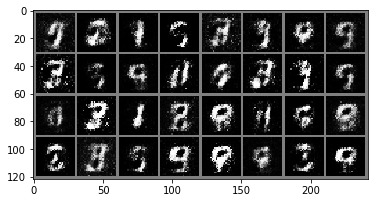

Epoch [1/3], Step[500/1875], d_loss: 0.8537, g_loss: 1.5904, D(x): 0.75, D(G(z)): 0.33


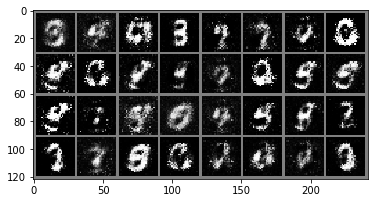

Epoch [1/3], Step[1000/1875], d_loss: 0.4879, g_loss: 2.4407, D(x): 0.85, D(G(z)): 0.23


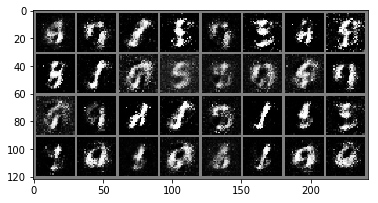

Epoch [1/3], Step[1500/1875], d_loss: 0.5068, g_loss: 1.9320, D(x): 0.88, D(G(z)): 0.27


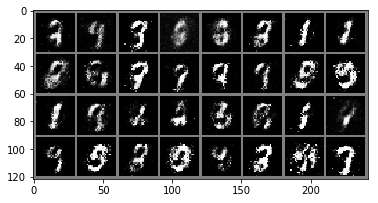

Epoch [2/3], Step[500/1875], d_loss: 0.5758, g_loss: 1.9694, D(x): 0.82, D(G(z)): 0.22


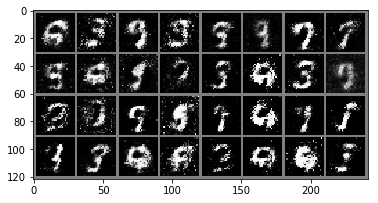

Epoch [2/3], Step[1000/1875], d_loss: 0.6325, g_loss: 1.6484, D(x): 0.76, D(G(z)): 0.23


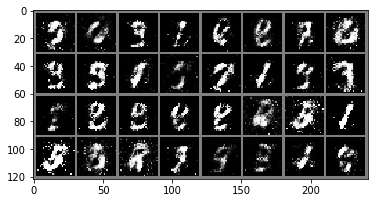

Epoch [2/3], Step[1500/1875], d_loss: 0.5539, g_loss: 1.5898, D(x): 0.84, D(G(z)): 0.22


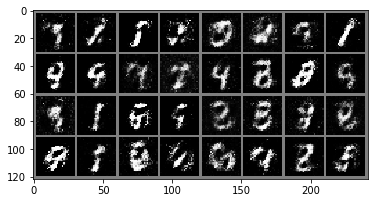

Epoch [3/3], Step[500/1875], d_loss: 0.8810, g_loss: 1.1571, D(x): 0.77, D(G(z)): 0.38


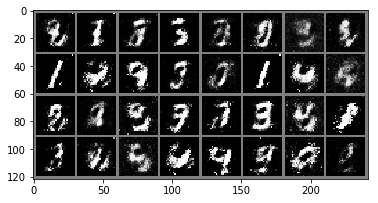

Epoch [3/3], Step[1000/1875], d_loss: 0.7457, g_loss: 1.1494, D(x): 0.71, D(G(z)): 0.24


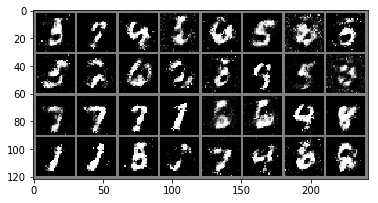

Epoch [3/3], Step[1500/1875], d_loss: 1.0977, g_loss: 1.1328, D(x): 0.71, D(G(z)): 0.41


In [27]:
for epoch in range(epochs):
    for n, (images, _) in enumerate(train_loader):
        images = Variable(images)
        real_labels = Variable(torch.ones(images.size(0))) #Binary case 니까
        
        # Random vector 만들어서,
        # Generator에 넣어서 Sample fake를 뽑기
        noise = Variable(torch.randn(images.size(0), 100)) # (배치사이즈, 100차원)
        fake_images = G(noise)
        fake_labels = Variable(torch.zeros(images.size(0)))
        
        ############################# Discriminator 학습 #############################
        d_loss, real_score, fake_score = train_D(D, images, real_labels, fake_images, fake_labels)
        
        # Generator에서 다시한번 샘플 뽑아서, D에다가 넣기 
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = G(noise)
        outputs = D(fake_images)
                                
        ############################# Generator 학습 #############################
        g_loss = train_G(G, outputs, real_labels)
        
        
        if (n+1) % 500 == 0:
            ##### 생성 이미지의 과정 #####
            imshow_grid(G(sample_z(32, 100)).view(-1, 1, 28, 28))            
            
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, ' 
                  'D(x): %.2f, D(G(z)): %.2f' 
                  %(epoch + 1, epochs, n+1, total_batch, d_loss.item(), g_loss.item(),
                    real_score.data.mean(), fake_score.data.mean()))


## 2.5. Test

In [28]:
test_img, test_label   = next(iter(test_loader))

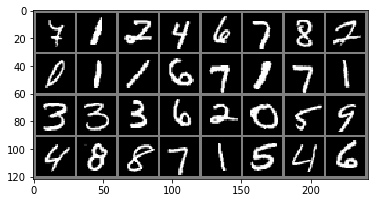

In [30]:
imshow_grid(test_img)

In [32]:
def sample_z(batch_size, d_noise):
    return torch.randn(batch_size, d_noise)

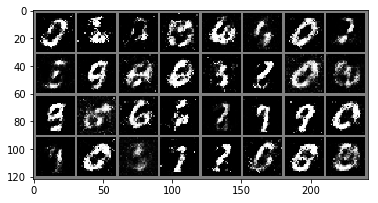

In [33]:
# 32개 배치사이즈의, 100차원 랜덤 벡터를 생성해서 Generator에 넣고,
# 나온 이미지를 리사이즈해서 
# imshow

predict = G(sample_z(32, 100)).view(-1, 1, 28, 28)
imshow_grid(predict)